In [244]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from matplotlib import pyplot as plt

In [245]:
df = pd.read_csv("../datasets/titanic.csv", nrows=50)
print(np.shape(df))
df.tail()

(50, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
45,46,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.0500,NaN,S
46,47,0,3,"Lennon, Mr. Denis",male,NaN,1,0,370371,15.5000,NaN,Q
47,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q
48,49,0,3,"Samaan, Mr. Youssef",male,NaN,2,0,2662,21.6792,NaN,C
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S


In [246]:
X = df[['Pclass', 'Sex', 'Age', 'Fare']]
y = df['Survived']
np.shape(X)

(50, 4)

In [247]:
X.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [248]:
dummy_sex = pd.get_dummies(df['Sex'])
X = pd.concat([X, dummy_sex], axis=1)
X = X.drop(['Sex'], axis=1)
X.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [249]:
X.isna().any()

Pclass    False
Age        True
Fare      False
female    False
male      False
dtype: bool

In [250]:
X['Age'] = X['Age'].fillna(X['Age'].mean())
print(X.isna().any())
X.head()

Pclass    False
Age       False
Fare      False
female    False
male      False
dtype: bool


,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [252]:
model.predict(X_test)

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1])

In [253]:
model.score(X_test, y_test)

0.8

In [254]:
model.predict([[1, 38.0, 71.2500, 1, 0]])

/home/vignesh-pt6720/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [255]:
# fig = plt.figure(figsize=(100,100))
# tree.plot_tree(model, feature_names=X.columns)

In [256]:
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

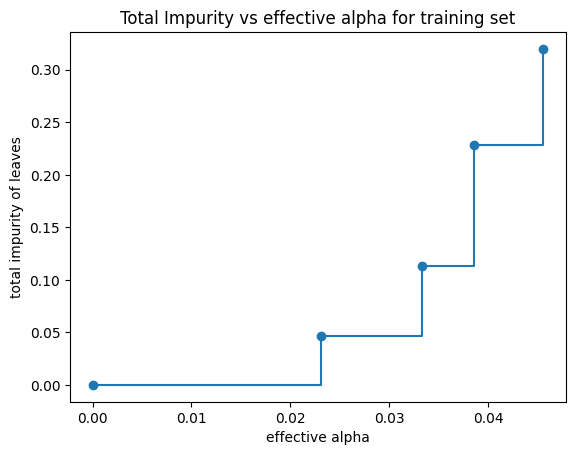

In [257]:
plt.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")
plt.title("Total Impurity vs effective alpha for training set")
plt.show()

In [258]:
models = []
for ccp_alpha in ccp_alphas:
    model = tree.DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    model.fit(X_train, y_train)
    models.append(model)

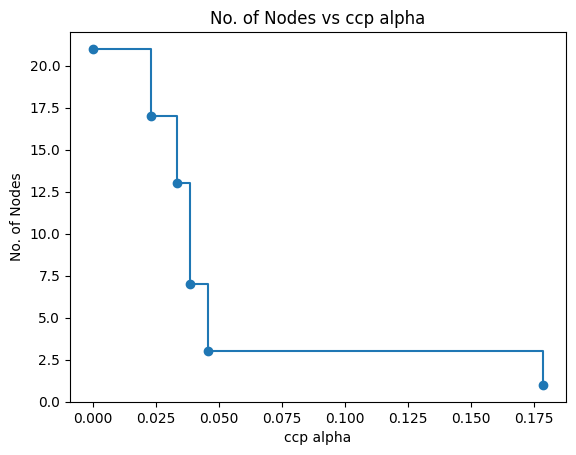

In [259]:
node_counts = [model.tree_.node_count for model in models]

plt.plot(ccp_alphas, node_counts, marker="o", drawstyle='steps-post')
plt.xlabel("ccp alpha")
plt.ylabel("No. of Nodes")
plt.title("No. of Nodes vs ccp alpha")
plt.show()

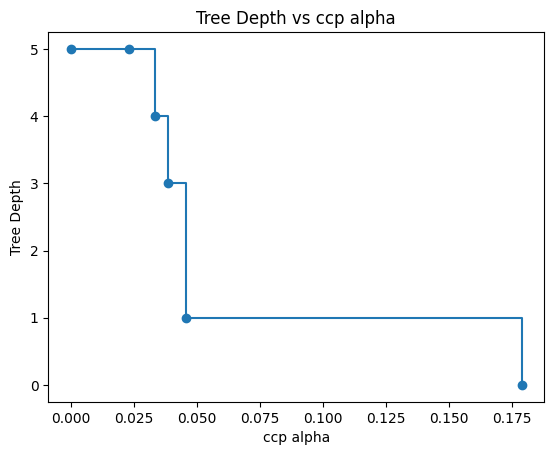

In [260]:
depth_counts = [model.tree_.max_depth for model in models]

plt.plot(ccp_alphas, depth_counts, marker="o", drawstyle='steps-post')
plt.xlabel("ccp alpha")
plt.ylabel("Tree Depth")
plt.title("Tree Depth vs ccp alpha")
plt.show()

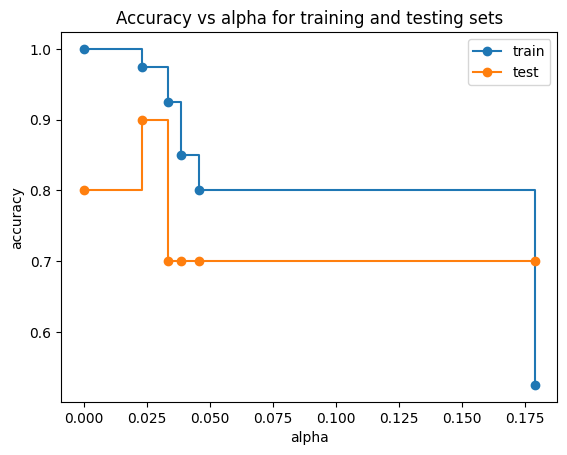

In [261]:
train_scores = [model.score(X_train, y_train) for model in models]
test_scores = [model.score(X_test, y_test) for model in models]

plt.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.title("Accuracy vs alpha for training and testing sets")
plt.legend()
plt.show()

In [263]:
# Final model

model = tree.DecisionTreeClassifier(ccp_alpha=0.025)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9

In [264]:
fig = plt.figure(figsize=(100,100))
tree.plot_tree(model, feature_names=X.columns)

[Text(0.5454545454545454, 0.9166666666666666, 'female <= 0.5\ngini = 0.499\nsamples = 40\nvalue = [21, 19]'),
 Text(0.36363636363636365, 0.75, 'Pclass <= 2.5\ngini = 0.308\nsamples = 21\nvalue = [17, 4]'),
 Text(0.2727272727272727, 0.5833333333333334, 'Age <= 34.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.18181818181818182, 0.4166666666666667, 'Fare <= 58.835\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.09090909090909091, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.2727272727272727, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.36363636363636365, 0.4166666666666667, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.45454545454545453, 0.5833333333333334, 'gini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.7272727272727273, 0.75, 'Fare <= 8.752\ngini = 0.332\nsamples = 19\nvalue = [4, 15]'),
 Text(0.6363636363636364, 0.5833333333333334, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.8181818181818182, 0.5833333333333334, 'Fare <= 23